## Dashboard de RH com Power BI e Python

### Definição do Problema

A empresa Incorp(fictícia) coletou dados do ano anterior com diversos atributos de funcionários de todos os setores. O objetivo é estudar a relação desses atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usado mais tarde para construir modelos de Machine Learning para prever se um colaborador será ou não promovido.


Essas são as perguntas que devem ser respondidas:

- Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?
- Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?
- Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?
- Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?
- Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?
- Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?
- Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

O trabalho aqui será limpar e preparar os dados e então construir um dashboard no Power BI para apresentar seus resultados.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark 

In [9]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Versoes dos pacotes usados nesse JNB 
%reload_ext watermark
%watermark -a "JLD" --iversions

matplotlib 3.2.1
pandas     1.1.4
numpy      1.19.4
seaborn    0.11.0
JLD


### Carregar dados 

In [3]:
dadosRH = pd.read_csv('dadosRH.csv')

In [4]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [5]:
dadosRH.shape

(54808, 11)

## Análise exploratória, Limpeza e Transformação de Dados

In [6]:
# Verificar se existem valores ausentes:
dadosRH.isnull().sum()

# note as cols educacao e aval_ano_anterios!!

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [7]:
# Checar os dados da col educacao:
dadosRH.groupby(['educacao']).count()

#OBS: o groupby não considera os valores ausentes!

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


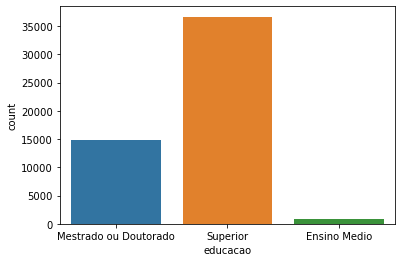

In [10]:
# Plot para a col educacao
sns.countplot(dadosRH['educacao'])

In [11]:
# Checar os dados da col aval_ano_anterior
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


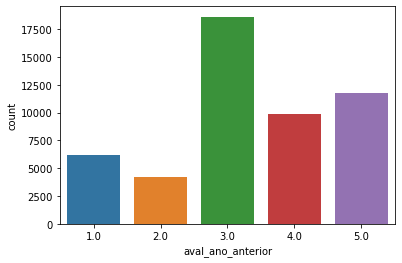

In [13]:
# Plot para a col aval_ano_anterior
sns.countplot(dadosRH['aval_ano_anterior'])

Aplicar imputação e preencher os valores ausentes

In [14]:
# Resoluução do problema da col educação (usando a moda, ou seja o valor que mais aparece!)
# a moda é calculada desconsiderando os valores ausentes:
# inplace = True -> add no próoprio df!!

dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)

In [17]:
# Resolução do problema da col aval_ano_anterior (usando a mediana)
# mediana (valor do meio) tb desnconsidera os valores ausentes!

dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True)

In [18]:
# Verificar se ainda existem valores ausentes:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [19]:
# Não perdemos nenhum dado!
dadosRH.shape

(54808, 11)

In [20]:
# Refazer a contagem da col educacao:

dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [21]:
# Refazer a contagem da aval_ano_anterior
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


Verifcar o balanceamento de classe na var "promovido"

In [22]:
# Valores 0 e 1:

dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


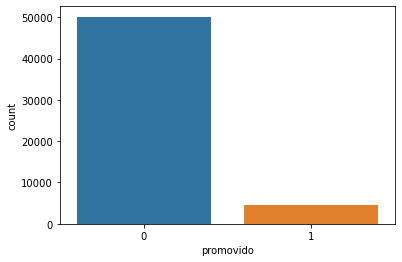

In [23]:
# Plot da col promovido:

sns.countplot(dadosRH['promovido'])

# Resolver o problema de desbalanceamento de classe!

In [24]:
# Criar novos df para classe 0 e classe 1

df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [25]:
df_classe_majoritaria.shape

(50140, 11)

In [26]:
df_classe_minoritaria.shape

(4668, 11)

In [27]:
# Aplicar a técnica Upsample da classe minoritária
from sklearn.utils import resample

df_classe_minoritaria_upsample = resample(df_classe_minoritaria, 
                                         replace = True,
                                         n_samples = 50140,
                                         random_state = 150)

# Aqui são criados registros sintéticos, de reamostragem dos dados!

In [28]:
# Concatenando as duas classes:

dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsample])

In [29]:
# Contar a quantidade de resgistros da col promovido dos dados balaceados:

dadosRH_balanceados.promovido.value_counts()

1    50140
0    50140
Name: promovido, dtype: int64

In [30]:
# Info dos dados:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


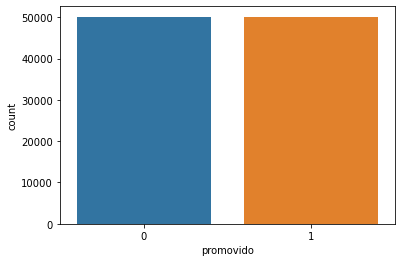

In [31]:
# Recriando o plot, agora com os dados balanceados:
sns.countplot(dadosRH_balanceados['promovido'])

# Agora com os dados balanceados, salvar o dataset com os dados que foram manipulados para ser usado no Power BI

In [32]:
# Salvar dataset em disco:
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding = 'utf-8', index = False)

#OBS: não salvar com o índice!

# Fim da manipulação dos dados!

### Carregar novamente os dados para continuar com o trabalho de análise!

A partir daqui os comandos serão executados no Power BI.

In [34]:
# Carregar os dados
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

# OBS: PowerBI só entende df como dataset!

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [36]:
# Verificar o formato:
dataset.shape

(100280, 11)

## Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

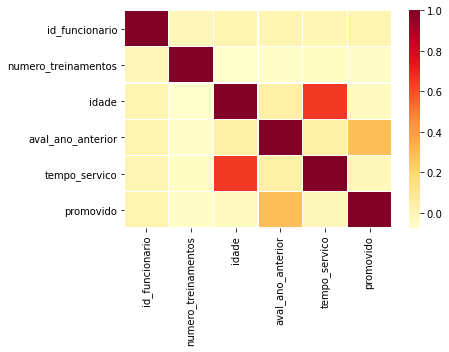

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()


#cmap -> mapa de cor do matplotlib

# OBS: 
# matriz de correlação = var numéricas
# matriz de associação = var categóricas

# Corr- uma var aumenta a outra diminui.
# Corr+ uma var aumenta a outra tb aumenta. 
# Prox de zero não há correlação. 

## Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

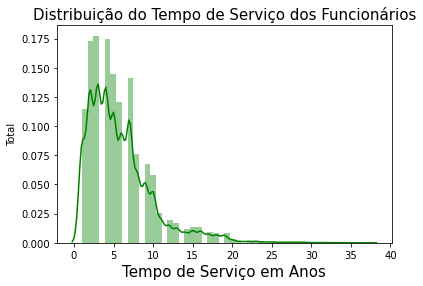

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(dataset['tempo_servico'], color = 'green')

plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total')
plt.show()


# Gráfico de distribuição para responder essa pergunta.

## Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?

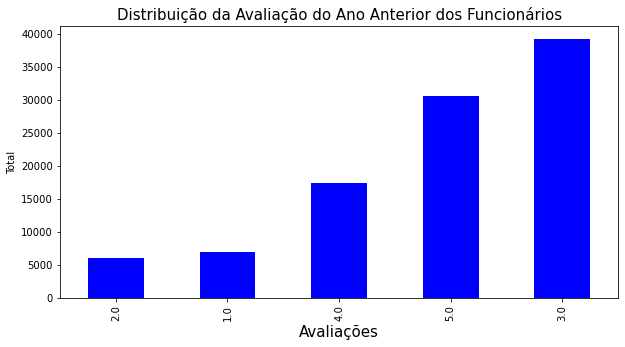

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue', figsize = (10,5))

plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total')
plt.show()


# Gráfico de barras para responder essa questão.
# 3 métodos do pandas concatenados em uma única instrução -> value_counts().sort_values().bar()
# .plot -> é um atributo 

## Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

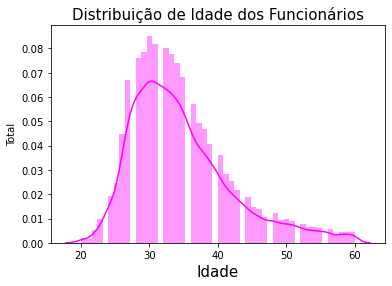

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(dataset['idade'], color = 'magenta')

plt.title('Distribuição de Idade dos Funcionários', fontsize = 15)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total')
plt.show()



# Gráfico de distribuição para responder essa pergunta

## Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?

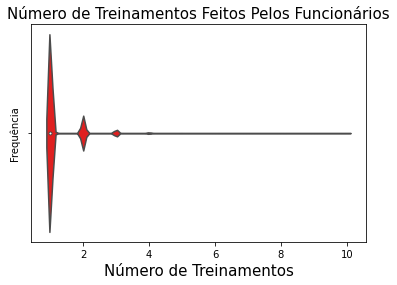

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(dataset['numero_treinamentos'], color = 'red')

plt.title('Número de Treinamentos Feitos Pelos Funcionários', fontsize = 15)
plt.xlabel('Número de Treinamentos', fontsize = 15)
plt.ylabel('Frequência')
plt.show()


# Gráfico violin p distribuição doss dados

## Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?

In [47]:
# Com esses valores vamos criar o gráfico abaixo: (em %)

dataset['canal_recrutamento'].value_counts() # totais 

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

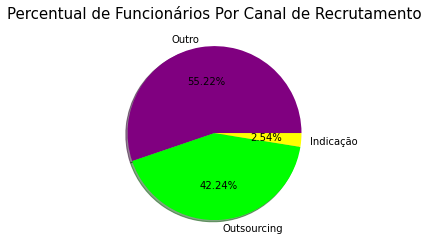

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset['canal_recrutamento'].value_counts() # totais 

fatias = [55375, 42358, 2547] # colocar os totais em uma lista py
labels = "Outro", "Outsourcing", "Indicação"
colors = ['purple', 'lime', 'yellow']
explode = [0, 0, 0] # fatias afastadas (nesse caso não usar)


# Gráfico
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%") # argumentos p plot pie 

plt.title('Percentual de Funcionários Por Canal de Recrutamento', fontsize = 15)
plt.axis('off')
# plt.legend()
plt.show()

## Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

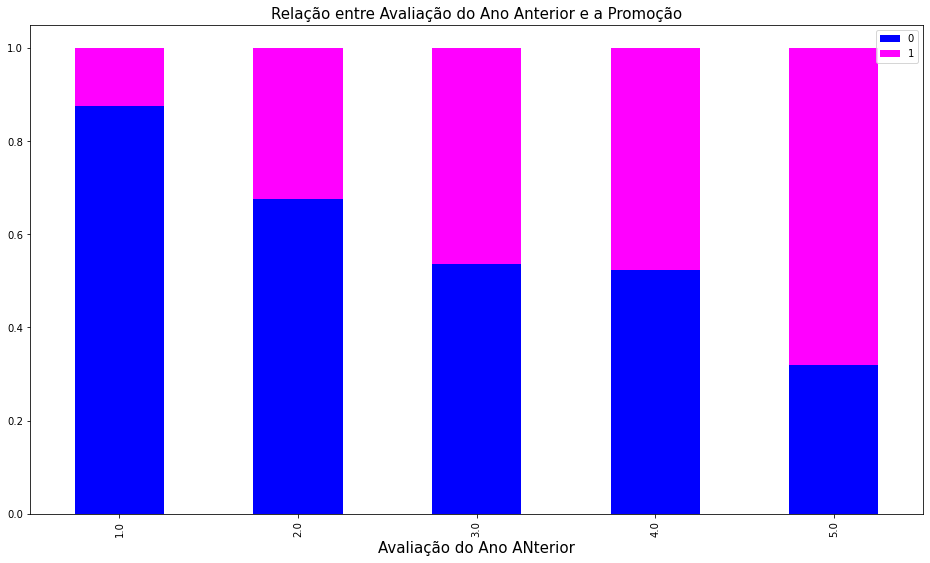

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])

data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                  stacked = True, 
                                                  figsize = (16, 9),
                                                  color = ['blue', 'magenta'])



plt.title('Relação entre Avaliação do Ano Anterior e a Promoção', fontsize = 15)
plt.xlabel('Avaliação do Ano ANterior', fontsize = 15)
plt.legend()
plt.show()


# OBS: Promocao é uma var categórica (por isso n se pode usar plot de dispersão)!
# e aval_ano_anterior tem 5 valores possíveis!
# O GRÁFICO DE DISPERSÃO É USADO QUANDO AS 2 VAR SÃO NUMÉRICAS!

# End